In [5]:
from PIL import Image as pil
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import math as math
import builtins

In [6]:
def brightness(elem):
        hsp = math.sqrt(
        0.299 * (elem[0] * elem[0]) +
        0.587 * (elem[1] * elem[1]) +
        0.114 * (elem[2] * elem[2])
        )
        return hsp

In [7]:
pathreference = 'imgs/maroon.png'
reference = pil.open(pathreference)

pathimg = 'imgs/red.png'
img = pil.open(pathimg)


reference = np.asarray(reference)
img = np.asarray(img)
dimensions = (256, 256)

reference = resize(reference, dimensions, anti_aliasing=True)
img = resize(img, dimensions, anti_aliasing=True)

brightnessreference = np.zeros(dimensions)
brightnessimg = np.zeros(dimensions)

dictreference = {}
dictimg = {}


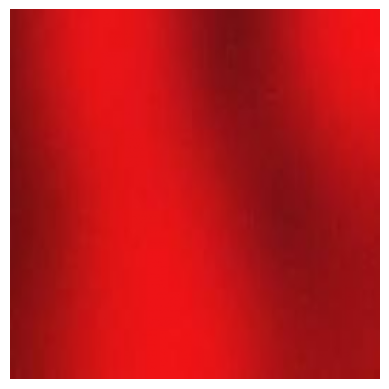

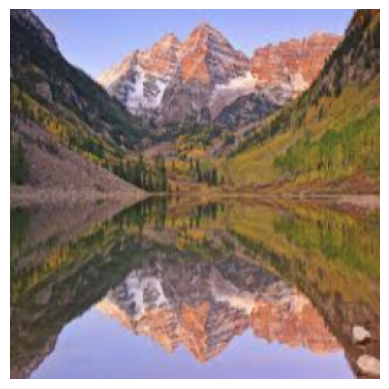

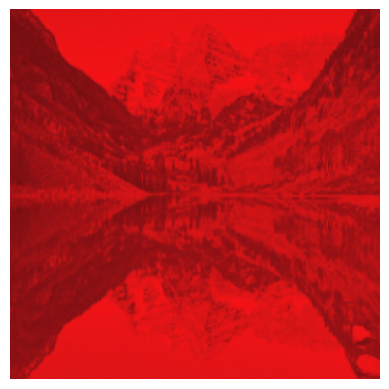

In [8]:
img_pixels = [(tuple(value[:3]), brightness(tuple(value[:3]))) for row in img for value in row]
ref_pixels = [((x, y), brightness(reference[y, x, :3])) for y in range(reference.shape[0]) for x in range(reference.shape[1])]

# --- Step 2: Sort both lists by brightness ---
img_pixels.sort(key=lambda x: x[1])      # sort by brightness
ref_pixels.sort(key=lambda x: x[1])      # sort by brightness

# --- Step 3: Map reference positions to image RGBs ---
mapped_pixels = {ref_pos: rgb for (ref_pos, _), (rgb, _) in zip(ref_pixels, img_pixels)}

# --- Step 4: Reconstruct new image ---
height,width = reference.shape[0], reference.shape[1]
new_img = np.zeros((height, width, 3), dtype=np.uint8)

for (x, y), rgb in mapped_pixels.items():
    rgb = np.array(rgb, dtype=float)
    # scale if RGB is normalized floats
    if rgb.max() <= 1.0:
        rgb = (rgb * 255).astype(np.uint8)
    else:
        rgb = rgb.astype(np.uint8)
    new_img[y, x] = rgb  # y=row, x=col

# --- Step 5: Show result ---
plt.imshow(img)
plt.axis("off")
plt.show()

plt.imshow(reference)
plt.axis("off")
plt.show()

plt.imshow(new_img)
plt.axis("off")
plt.show()